In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np

# QSP signal loading & Designing QSVT circuit

In [2]:
# beta = 5, degree = 102, epsilon=0 (짝수 degree이여야 함)
phase_str_input = """0.785772127121113
-0.000425226972078656
0.000476461808984088
-0.000529414058214937
0.000581359183656461
-0.000634981799775448
0.000688038659967571
-0.000743409083150673
0.000798909581802633
-0.000857430821584228
0.000916792362536284
-0.000979895746957432
0.00104458496363608
-0.00111380140558094
0.00118544516364086
-0.00126253088683332
0.00134305049244090
-0.00143013114457892
0.00152190092498953
-0.00162165075819057
0.00172770522741767
-0.00184359111765438
0.00196791672443003
-0.00210455128822130
0.00225251834180526
-0.00241619332269503
0.00259522065420298
-0.00279474257487214
0.00301535769915258
-0.00326340548755474
0.00354100033060951
-0.00385641971450536
0.00421428263256035
-0.00462614140881001
0.00510095205622573
-0.00565609151287366
0.00630845942749262
-0.00708645103933205
0.00802253693719754
-0.00916757500861107
0.0105871862658025
-0.0123823922003407
0.0146968241541342
-0.0177564127700781
0.0219108464822945
-0.0277353328777014
0.0361813550452377
-0.0488450708608460
0.0682274774954872
-0.0972753892058450
0.134998009697666
-0.162161066565843
0.134998009697666
-0.0972753892058450
0.0682274774954872
-0.0488450708608460
0.0361813550452377
-0.0277353328777014
0.0219108464822945
-0.0177564127700781
0.0146968241541342
-0.0123823922003407
0.0105871862658025
-0.00916757500861107
0.00802253693719754
-0.00708645103933205
0.00630845942749262
-0.00565609151287366
0.00510095205622573
-0.00462614140881001
0.00421428263256035
-0.00385641971450536
0.00354100033060951
-0.00326340548755474
0.00301535769915258
-0.00279474257487214
0.00259522065420298
-0.00241619332269503
0.00225251834180526
-0.00210455128822130
0.00196791672443003
-0.00184359111765438
0.00172770522741767
-0.00162165075819057
0.00152190092498953
-0.00143013114457892
0.00134305049244090
-0.00126253088683332
0.00118544516364086
-0.00111380140558094
0.00104458496363608
-0.000979895746957432
0.000916792362536284
-0.000857430821584228
0.000798909581802633
-0.000743409083150673
0.000688038659967571
-0.000634981799775448
0.000581359183656461
-0.000529414058214937
0.000476461808984088
-0.000425226972078656
0.785772127121113"""

In [3]:
# beta = 5, degree = 32, epsilon=0 (짝수 degree이여야 함)
phase_str_input = """0.782025791265972
0.00412392108795260
-0.00498502655642925
0.00600565017853955
-0.00720661567980189
0.00867792986043325
-0.0104936520333378
0.0128222614633125
-0.0158616608172589
0.0199843070182096
-0.0257343944384533
0.0340822431900313
-0.0465886408453450
0.0657718119804017
-0.0945570241836318
0.132032749378600
-0.159074754567499
0.132032749378600
-0.0945570241836318
0.0657718119804017
-0.0465886408453450
0.0340822431900313
-0.0257343944384533
0.0199843070182096
-0.0158616608172589
0.0128222614633125
-0.0104936520333378
0.00867792986043325
-0.00720661567980189
0.00600565017853955
-0.00498502655642925
0.00412392108795260
0.782025791265972"""

In [4]:
phase_list = np.array([float(line.strip()) for line in phase_str_input.strip().splitlines() if line.strip()])

print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[ 0.78202579  0.00412392 -0.00498503  0.00600565 -0.00720662  0.00867793
 -0.01049365  0.01282226 -0.01586166  0.01998431 -0.02573439  0.03408224
 -0.04658864  0.06577181 -0.09455702  0.13203275 -0.15907475  0.13203275
 -0.09455702  0.06577181 -0.04658864  0.03408224 -0.02573439  0.01998431
 -0.01586166  0.01282226 -0.01049365  0.00867793 -0.00720662  0.00600565
 -0.00498503  0.00412392  0.78202579]
총 33개 숫자


In [5]:
def wx_to_reflection_angle(phases):

    d = len(phases) - 1
    result = [0 for i in range(d)]
    result[0] = phases[0] + phases[d] + (d-1)*(np.pi/2)
    for i in range(1, d):
        result[i] = phases[i] - np.pi/2
    return result

phase_list = wx_to_reflection_angle(phase_list)

print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[np.float64(50.25873771317374), np.float64(-1.5666724057069439), np.float64(-1.5757813533513259), np.float64(-1.564790676616357), np.float64(-1.5780029424746984), np.float64(-1.5621183969344634), np.float64(-1.5812899788282344), np.float64(-1.5579740653315841), np.float64(-1.5866579876121554), np.float64(-1.550812019776687), np.float64(-1.59653072123335), np.float64(-1.5367140836048652), np.float64(-1.6173849676402416), np.float64(-1.505024514814495), np.float64(-1.6653533509785283), np.float64(-1.4387635774162966), np.float64(-1.7298710813623956), np.float64(-1.4387635774162966), np.float64(-1.6653533509785283), np.float64(-1.505024514814495), np.float64(-1.6173849676402416), np.float64(-1.5367140836048652), np.float64(-1.59653072123335), np.float64(-1.550812019776687), np.float64(-1.5866579876121554), np.float64(-1.5579740653315841), np.float64(-1.5812899788282344), np.float64(-1.5621183969344634), np.float64(-1.5780029424746984), np.float64(-1.564790676616357), np.float64(-1.5757813

In [6]:
from qiskit.circuit.library import XGate

def real_QSVT(QSVT_m: int, phases, U_A: QuantumCircuit) -> QuantumCircuit:

    qc = QuantumCircuit(1 + U_A.num_qubits) 
    
    c_pi_not_gate = QuantumCircuit(QSVT_m + 1)
    c_pi_not_gate.compose(XGate().control(QSVT_m, ctrl_state='0'*QSVT_m), qubits=[i for i in range(1, QSVT_m+1)]+[0], inplace=True)
    
    qc.h(0)
    
    qc.h(range(QSVT_m+1, 1+U_A.num_qubits))
    
    d = len(phases)
    for j in range(d//2):
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-1-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
        qc.compose(U_A.inverse(), qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-2-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
    if d%2 == 1: 
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[0], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)


    qc.h(0) 
    return qc

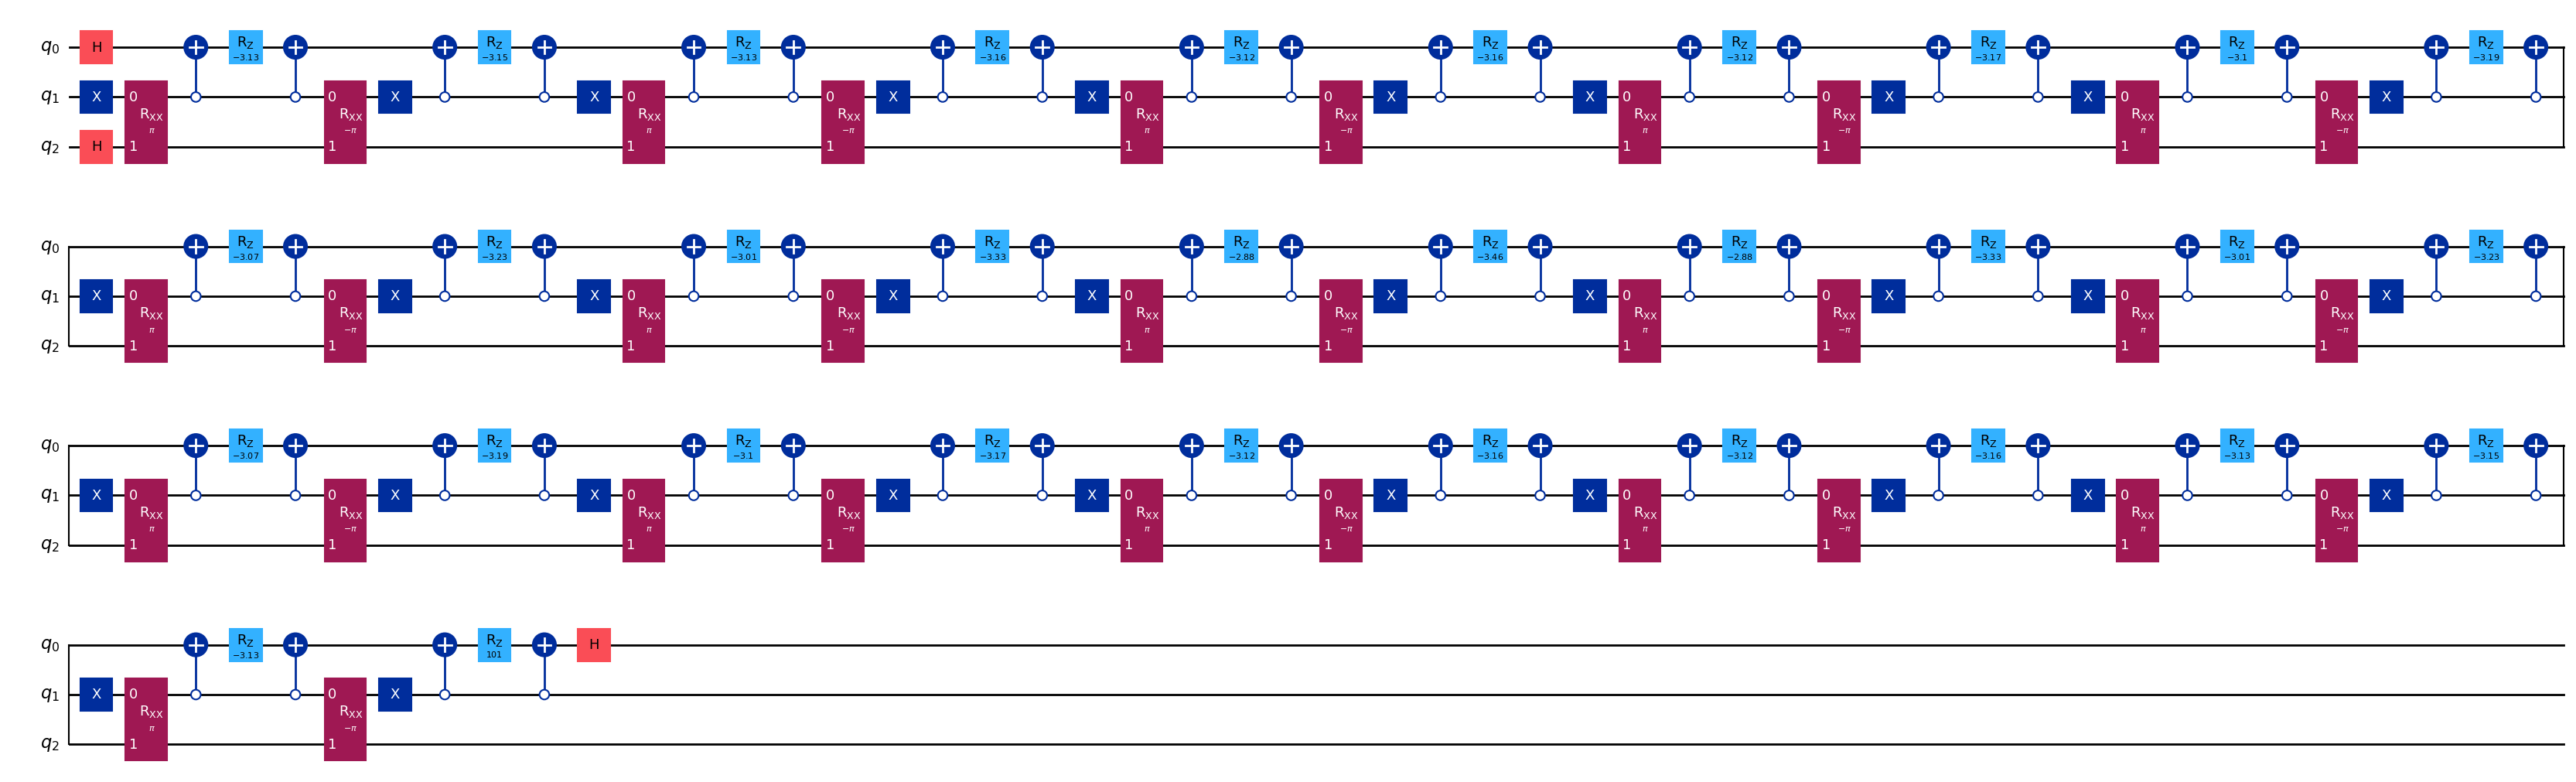

In [7]:
# Example

unitary_embedding_qc = QuantumCircuit(2)
unitary_embedding_qc.x(0)
unitary_embedding_qc.rxx(np.pi, 0, 1)

QSVT_qc = real_QSVT(1, phase_list, unitary_embedding_qc)
QSVT_qc.draw('mpl', fold=50)

# Max cut simulation을 위한 hamiltonian 제작

In [8]:
import networkx as nx

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

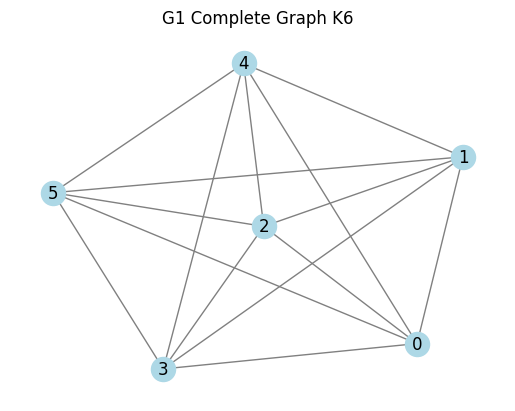

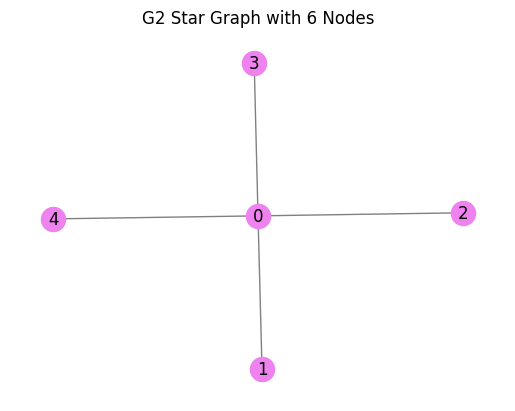

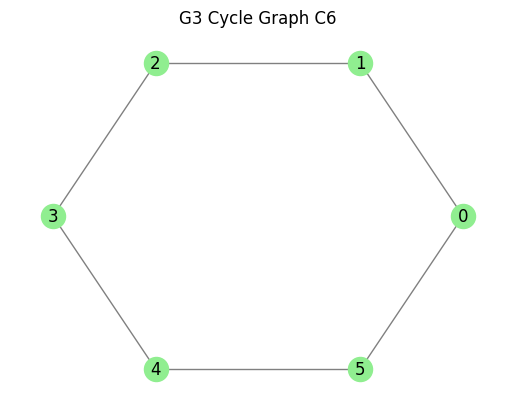

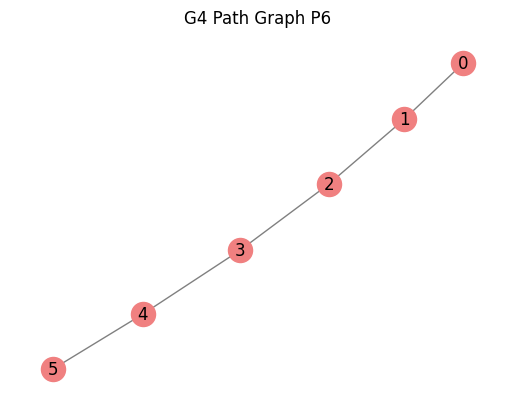

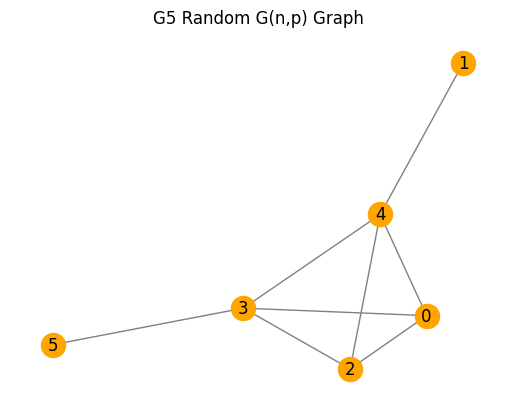

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def complete_graph_k6():
    G = nx.complete_graph(6)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots() 
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')
    ax.set_title("G1 Complete Graph K6")
    plt.show()
    return G

def star_graph_6():
    G = nx.star_graph(4)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='violet', edge_color='gray')
    ax.set_title("G2 Star Graph with 6 Nodes")
    plt.show()
    return G

def cycle_graph_c6():
    G = nx.cycle_graph(6)
    pos = nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightgreen', edge_color='gray')
    ax.set_title("G3 Cycle Graph C6")
    plt.show()
    return G

def path_graph_p6():
    G = nx.path_graph(6)
    pos = nx.spring_layout(G)  # 또는 nx.shell_layout(G), nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightcoral', edge_color='gray')
    ax.set_title("G4 Path Graph P6")
    plt.show()
    return G

def random_graph_gnp(n=6, p=0.4, seed=42):
    G = nx.erdos_renyi_graph(n, p, seed=seed)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='orange', edge_color='gray')
    ax.set_title("G5 Random G(n,p) Graph")
    plt.show()
    return G

G1 = complete_graph_k6()
G2 = star_graph_6()
G3 = cycle_graph_c6()
G4 = path_graph_p6()
G5 = random_graph_gnp()

In [10]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate, YGate, ZGate
from qiskit.quantum_info import SparsePauliOp
from math import ceil, log2

def lcu_block_encoding(operator: SparsePauliOp):

    pauli_labels = operator.paulis.to_labels()
    coeffs = operator.coeffs.real

    filtered_pauli_labels = []
    filtered_coeffs = []
    for label, coeff in zip(pauli_labels, coeffs):
        if not np.isclose(coeff, 0):
            filtered_pauli_labels.append(label)
            filtered_coeffs.append(coeff)
    
    num_terms = len(filtered_coeffs)
    num_qubits = operator.num_qubits

    if num_terms == 0:
        raise ValueError("Operator has no terms with non-zero coefficients.")
    
    lam = np.sum(np.abs(filtered_coeffs))
    ancilla_bits = ceil(log2(num_terms)) if num_terms > 1 else 0 
    
    if ancilla_bits > 0:
        anc = QuantumRegister(ancilla_bits, name='a')
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(anc, data)
        ancilla_qubits_list = anc[:]
    else:
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(data)
        ancilla_qubits_list = []

    if ancilla_bits > 0:
        prepare_vector = np.zeros(2**ancilla_bits, dtype=complex)
        normalized_amplitudes = np.sqrt(np.abs(filtered_coeffs) / lam)
        for i in range(num_terms):
            prepare_vector[i] = normalized_amplitudes[i]
            if filtered_coeffs[i] < 0:
                prepare_vector[i] *= -1
        

        prepare_circuit = QuantumCircuit(ancilla_bits, name='PREPARE')
        prepare_circuit.prepare_state(prepare_vector, range(ancilla_bits))
        
        prepare_gate = prepare_circuit.to_gate()
        
        circuit.append(prepare_gate, anc)
        circuit.barrier()

    for idx, pauli_label in enumerate(filtered_pauli_labels):
        ctrl_state = format(idx, f'0{ancilla_bits}b') if ancilla_bits > 0 else None

        for qubit_idx, p in enumerate(reversed(pauli_label)):
            if p == 'I':
                continue

            if p == 'X':
                base_gate = XGate()
            elif p == 'Y':
                base_gate = YGate()
            elif p == 'Z':
                base_gate = ZGate()
            else:
                raise ValueError(f"알 수 없는 파울리 연산자: {p}")

            if ancilla_bits > 0:
                controlled_gate = base_gate.control(num_ctrl_qubits=ancilla_bits, ctrl_state=ctrl_state)
                circuit.append(controlled_gate, ancilla_qubits_list + [data[qubit_idx]])
            else:
                circuit.append(base_gate, [data[qubit_idx]])
    
    circuit.barrier()


    if ancilla_bits > 0:
        circuit.append(prepare_gate.inverse(), anc)

    return circuit, lam


In [11]:
qc, lam = lcu_block_encoding(build_maxcut_hamiltonian(G4))

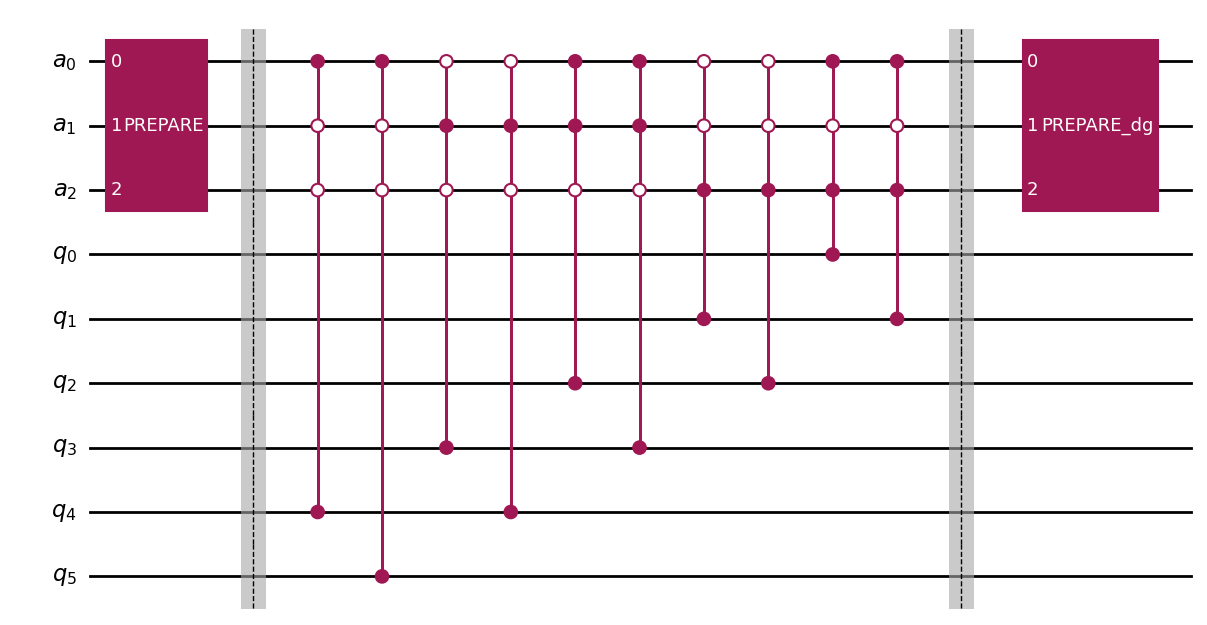

In [12]:
qc.draw('mpl')

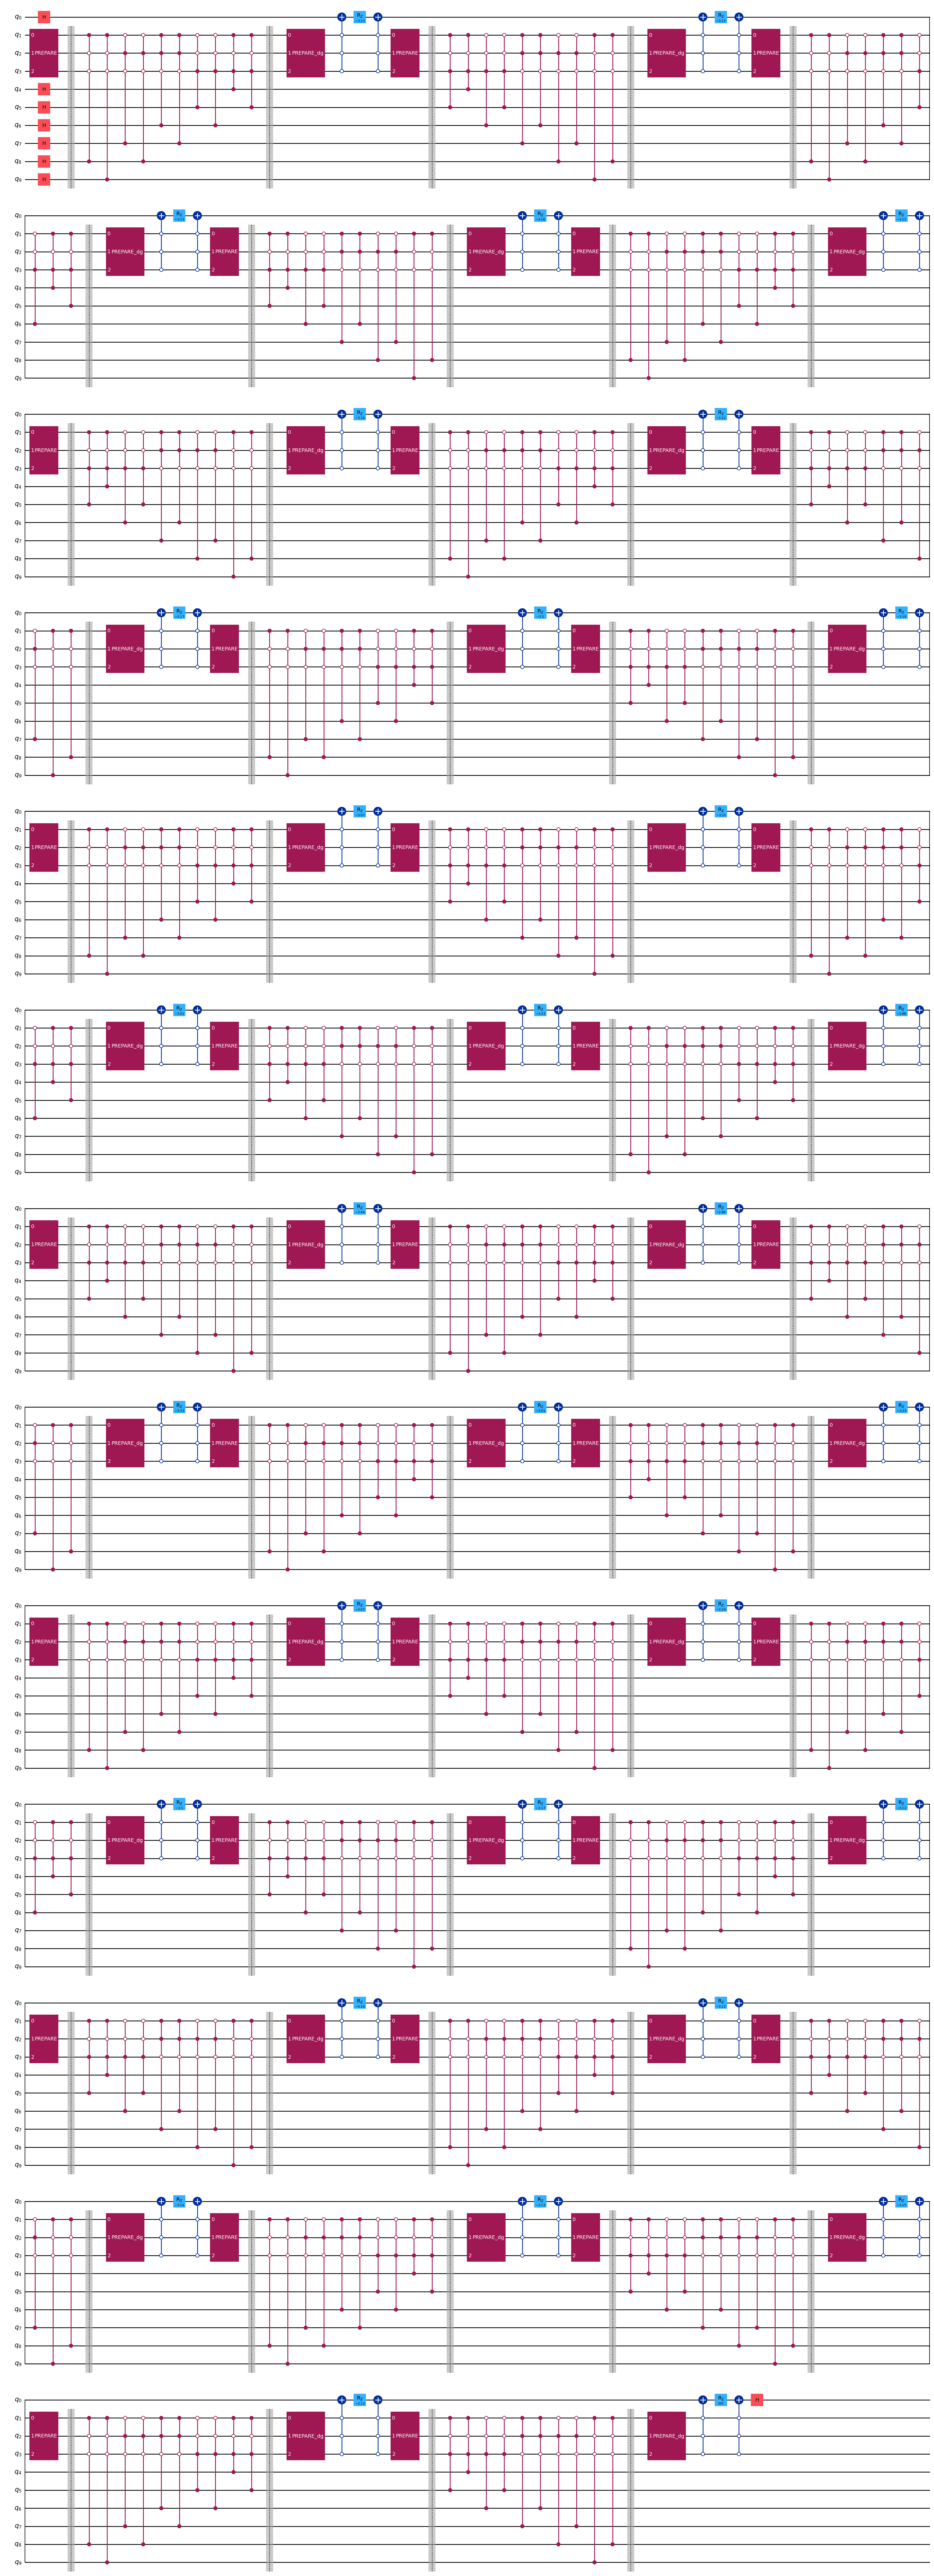

In [13]:
QSVT_qc = real_QSVT(3, phase_list, qc)
QSVT_qc.draw('mpl', fold=50)

In [14]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np

{'0101000000': 2032, '1011010000': 2240, '1010100000': 12813, '1010110000': 2092, '0010100000': 2125, '0101010000': 12868, '1101010000': 2081, '1010010000': 2212, '0101100000': 2148, '0100010000': 293, '1001010000': 2167, '0010010000': 326, '1110100000': 283, '0100100000': 2223, '0001010000': 307, '1010000000': 332, '1011100000': 311, '1001100000': 309, '0110100000': 2077, '1110010000': 51, '1101000000': 314, '0110010000': 304, '1001000000': 308, '0110000000': 53, '1101100000': 319, '0110110000': 338, '0111100000': 28, '1100110000': 49, '1011110000': 44, '0100110000': 319, '1000100000': 292, '0011010000': 301, '0001000000': 42, '0010110000': 301, '1100100000': 308, '0000100000': 43, '0111010000': 297, '0111000000': 53, '0011000000': 54, '1000010000': 48, '1100010000': 43, '0101110000': 304, '1000110000': 42, '0111110000': 3, '1111000000': 4, '0010000000': 47, '1110110000': 55, '1011000000': 320, '0000110000': 2, '1111010000': 39, '1101110000': 39, '0000010000': 4, '1001110000': 49, '00

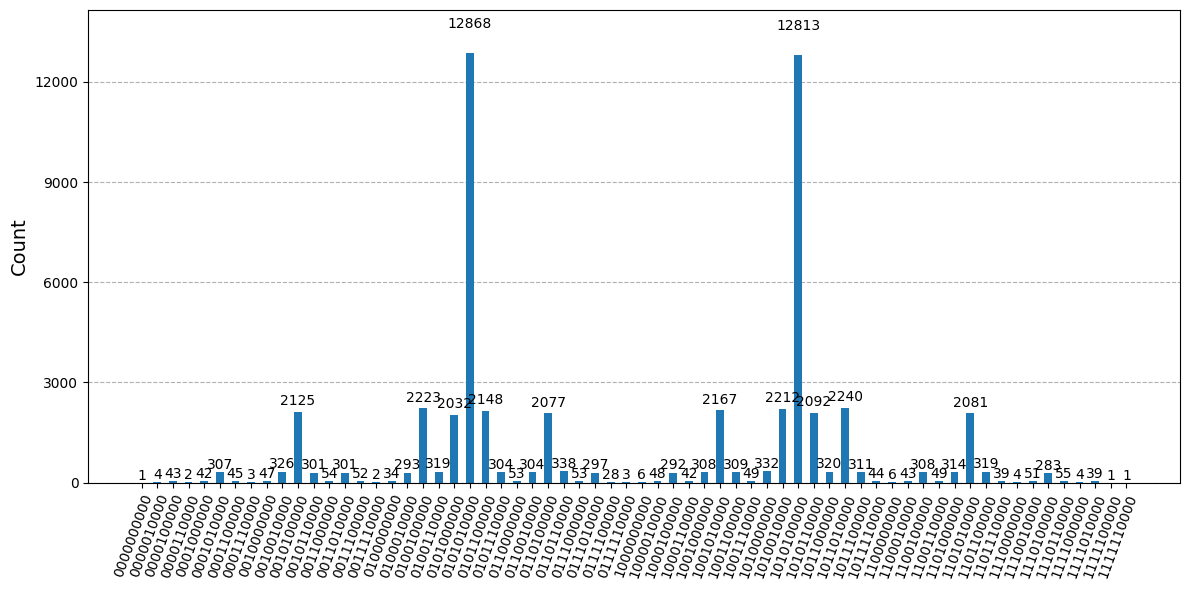

In [15]:
from qiskit.visualization import plot_histogram

N=2
QSVT_qc.measure_all()
sampler = StatevectorSampler()

pub = (QSVT_qc)
job = sampler.run([pub], shots=1000000)

result = job.result()[0]

def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N + 2)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict

count_result = result.data.meas.get_counts()
print(filter_dict_by_trailing_zeros(count_result, N))
plot_histogram(filter_dict_by_trailing_zeros(count_result, N), figsize=(12,6))

In [ ]:
from qiskit_aer.noise import (
    NoiseModel, depolarizing_error, pauli_error,
    phase_damping_error, amplitude_damping_error, ReadoutError
)
from qiskit_aer import AerSimulator
from qiskit import transpile



def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N + 2)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict


def make_noise_model(kind: str, p: float) -> NoiseModel:

    nm = NoiseModel()
    if kind == "depolarizing":
        # 1-qubit & 2-qubit 동일 확률
        nm.add_all_qubit_quantum_error(depolarizing_error(p, 1),
                                       ['x','y','z','h','sx','u'])
        nm.add_all_qubit_quantum_error(depolarizing_error(p, 2),
                                       ['cx'])

    elif kind == "phase_damping":
        pd = phase_damping_error(p)
        nm.add_all_qubit_quantum_error(pd,  ['x','y','z','h','sx','u'])
    elif kind == "amplitude_damping":
        ad = amplitude_damping_error(p)
        nm.add_all_qubit_quantum_error(ad,  ['x','y','z','h','sx','u'])
    elif kind == "readout":
        ro = ReadoutError([[1-p, p],
                           [p, 1-p]])
        nm.add_all_qubit_readout_error(ro)
    else:
        raise ValueError(f"Unknown noise type: {kind}")
    return nm


N=2
noise_kinds = ["depolarizing", "phase_damping", "amplitude_damping", "readout"]
shots = 16777216



{'0101110000': 6105, '1000110000': 2838, '1111010000': 3457, '0110100000': 19989, '1001010000': 19756, '1110110000': 2649, '1010100000': 99147, '1011100000': 6381, '1100100000': 5592, '1001000000': 5432, '1111000000': 2491, '0110110000': 5401, '0111000000': 2819, '0000100000': 3497, '0010100000': 20246, '0001000000': 2577, '0010010000': 5575, '0001110000': 2144, '0010000000': 2842, '0110000000': 2651, '0011100000': 2658, '0101100000': 19757, '1100010000': 2625, '1011110000': 3006, '0100000000': 2944, '1011010000': 19992, '1110010000': 2618, '1111100000': 2403, '0100010000': 6307, '0000000000': 5252, '0101010000': 100193, '1001100000': 5346, '1110100000': 6197, '0111010000': 6428, '1101010000': 20057, '1101000000': 5536, '1011000000': 5731, '0010110000': 5603, '0101000000': 20231, '0110010000': 5417, '1101110000': 2853, '0011010000': 5640, '1101100000': 5487, '0111110000': 2299, '0100100000': 19945, '1010110000': 20128, '1010010000': 20092, '0111100000': 2994, '1100000000': 2215, '00010

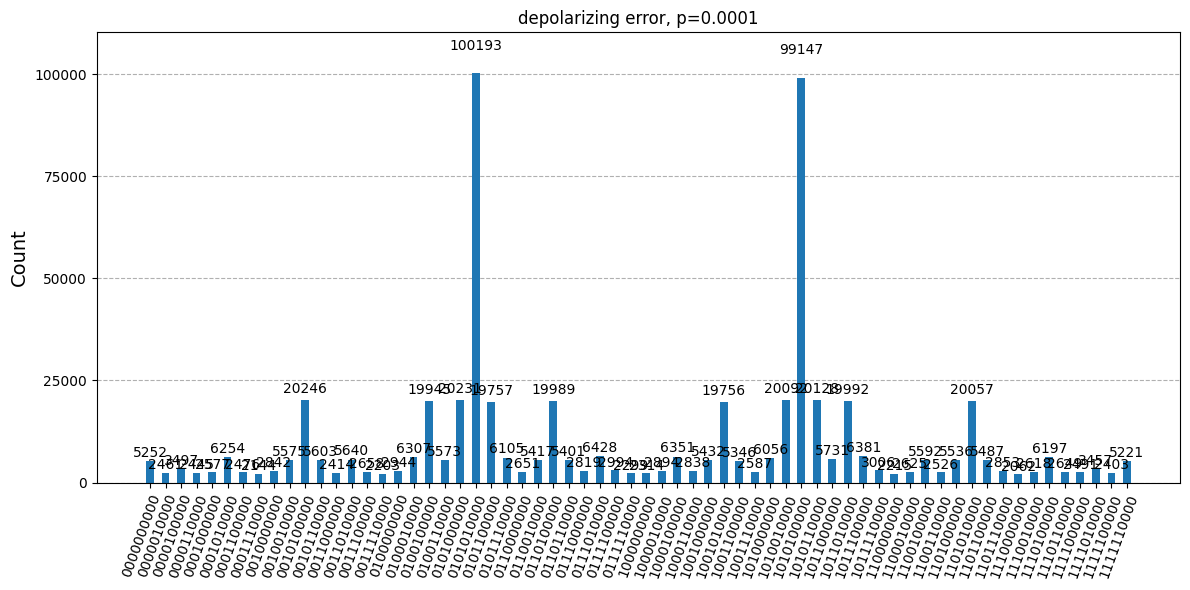

In [18]:
noise_model = make_noise_model("depolarizing", p=0.0001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title  = 'depolarizing error, p=0.0001')

{'0110100000': 8688, '1000110000': 7359, '1111010000': 7550, '1110100000': 7653, '0110010000': 7289, '0101110000': 7738, '0010110000': 7415, '1100010000': 6972, '1101000000': 7398, '0100010000': 7920, '1100000000': 6961, '1001010000': 8732, '1110110000': 7181, '1101100000': 7366, '1010100000': 13361, '1001000000': 7576, '1111000000': 7091, '0110000000': 7080, '1010110000': 8731, '1111110000': 7416, '0001010000': 7638, '1000100000': 7900, '0010010000': 7458, '0110110000': 7406, '1010000000': 7854, '1100100000': 7533, '0111110000': 7244, '1100110000': 6913, '0010100000': 8905, '1110010000': 7033, '1011010000': 8759, '0000000000': 7593, '0001110000': 6947, '0000100000': 7625, '0101000000': 8784, '0101010000': 13589, '0100110000': 7508, '1101010000': 8806, '0100000000': 7375, '0100100000': 8717, '0000110000': 7225, '0001000000': 7114, '0011010000': 7416, '1011110000': 7276, '1101110000': 7124, '1010010000': 8765, '1111100000': 7233, '0111000000': 7347, '0111100000': 7421, '1110000000': 693

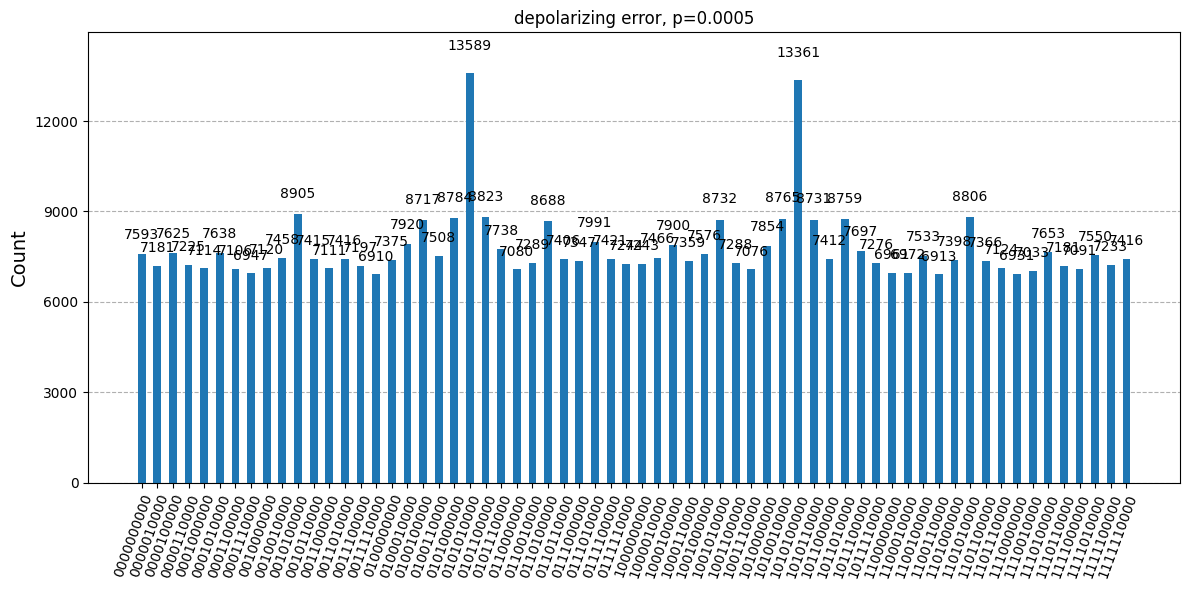

In [17]:
noise_model = make_noise_model("depolarizing", p=0.0005)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title  = 'depolarizing error, p=0.0005')

{'0101010000': 80459, '0110000000': 402, '0100000000': 438, '0001110000': 126, '1001010000': 14551, '1110110000': 421, '1101100000': 2259, '1010100000': 80819, '0010010000': 2132, '1111010000': 464, '1000110000': 409, '0000000000': 140, '0100010000': 2296, '0101100000': 14449, '0110100000': 14343, '0001000000': 410, '0110110000': 2284, '1010010000': 14621, '1010000000': 2153, '1011010000': 14704, '1110010000': 427, '0110010000': 2242, '0010100000': 14738, '1010110000': 14504, '1101010000': 14615, '1001000000': 2225, '1100010000': 389, '1101000000': 2230, '0101000000': 14595, '0010110000': 2233, '1101110000': 421, '0100100000': 14689, '1110100000': 2268, '0001100000': 441, '0101110000': 2177, '0111000000': 448, '1100100000': 2245, '0001010000': 2215, '1001100000': 2165, '1011100000': 2350, '0111010000': 2135, '1011000000': 2324, '1001110000': 431, '1000100000': 2201, '0100110000': 2294, '0011010000': 2223, '0000100000': 429, '1000010000': 435, '1110000000': 114, '0111100000': 445, '0011

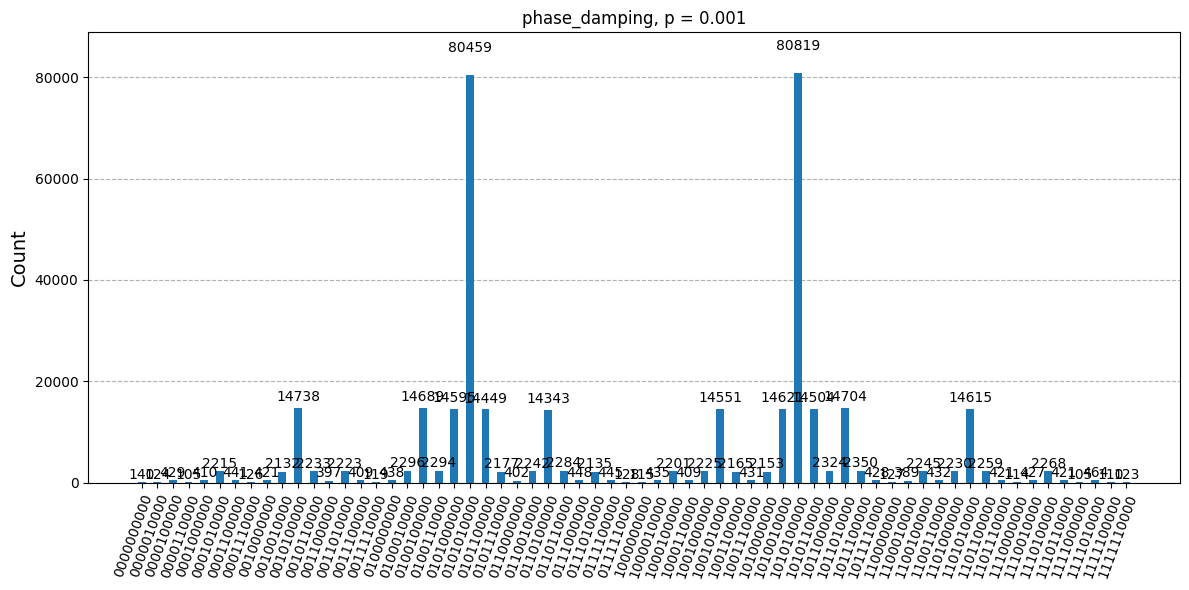

In [19]:
noise_model = make_noise_model("phase_damping", p=0.001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'phase_damping, p = 0.001')

{'0110100000': 2250, '0110110000': 1164, '0010100000': 2193, '0010110000': 1113, '0110000000': 715, '0001110000': 514, '0000000000': 403, '1110010000': 711, '0100010000': 1209, '1110100000': 1180, '0101000000': 2222, '0110010000': 1110, '1110110000': 688, '1001010000': 2205, '0111000000': 729, '0001000000': 701, '1111010000': 748, '1000110000': 768, '0010010000': 1124, '1101000000': 1079, '0100000000': 721, '1100010000': 781, '0101110000': 1157, '1101100000': 1213, '1010010000': 2278, '1000100000': 1208, '1001100000': 1163, '1000010000': 770, '1001000000': 1130, '1101110000': 650, '1100000000': 551, '0101010000': 3772, '0011010000': 1184, '1000000000': 604, '1010000000': 1177, '1011100000': 1200, '1100100000': 1166, '0100100000': 2416, '0111110000': 562, '0111010000': 1202, '0101100000': 2234, '1011010000': 2380, '1110000000': 523, '0000100000': 765, '1111000000': 551, '1010100000': 3823, '1100110000': 694, '0010000000': 695, '1101010000': 2158, '1010110000': 2248, '0001010000': 1183, 

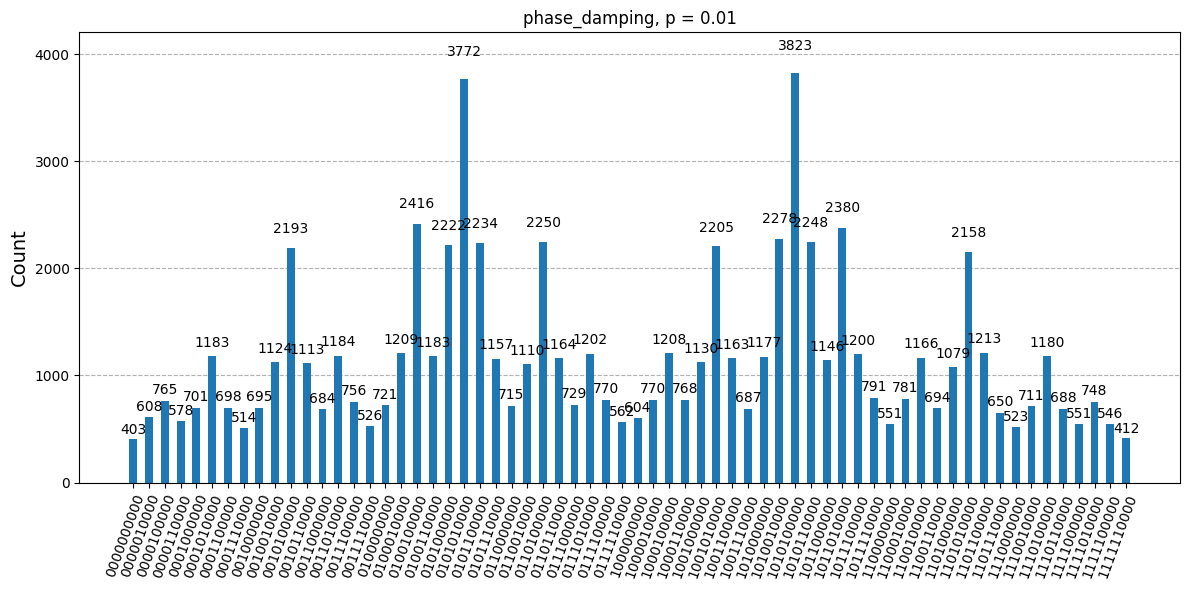

In [20]:
noise_model = make_noise_model("phase_damping", p=0.01)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'phase_damping, p = 0.01')

{'1010110000': 30440, '1101010000': 30907, '0110100000': 30427, '1010010000': 30864, '0100010000': 7353, '0110110000': 6604, '0010110000': 6580, '1101100000': 6564, '1010100000': 169469, '0011000000': 2012, '1011010000': 30427, '0110010000': 6442, '0101000000': 30741, '0101110000': 6830, '0001110000': 1320, '0100000000': 2285, '1000100000': 7255, '1000110000': 2137, '1111010000': 2447, '1001010000': 30769, '1110110000': 2061, '0001000000': 2060, '0100100000': 30788, '0010010000': 6658, '0001010000': 7233, '1110010000': 2032, '1001000000': 6662, '1110000000': 1323, '1110100000': 7066, '1001100000': 6422, '0101010000': 169151, '0010100000': 30822, '0100110000': 6716, '0110000000': 2133, '0101100000': 30422, '1111110000': 5179, '0000000000': 5504, '1101000000': 6619, '1000000000': 1427, '1011110000': 2145, '1100010000': 2044, '0011010000': 6599, '1100000000': 1463, '1010000000': 7249, '0111000000': 2151, '1001110000': 2030, '0001100000': 1926, '1011100000': 7217, '0111010000': 7032, '0000

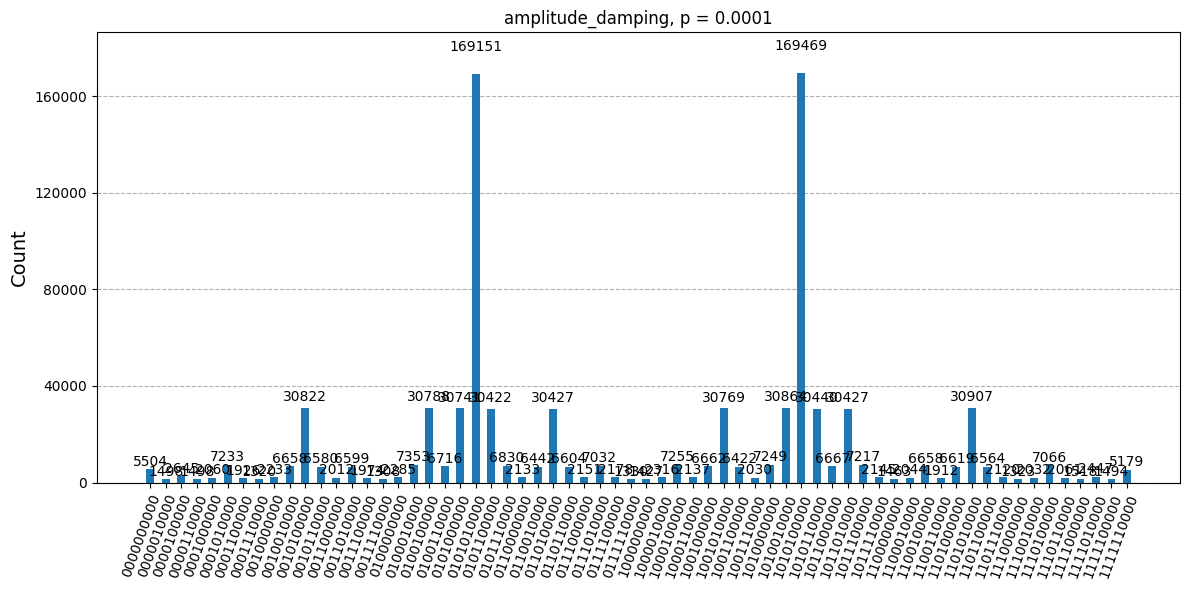

In [21]:
noise_model = make_noise_model("amplitude_damping", p=0.0001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'amplitude_damping, p = 0.0001')

{'1101000000': 9676, '1101100000': 8409, '1010100000': 25638, '0001000000': 8742, '0110010000': 9044, '0101110000': 8664, '1101110000': 6743, '1000010000': 9497, '0110000000': 8390, '0101100000': 11897, '1110010000': 7581, '0001110000': 6447, '0101010000': 26492, '0100000000': 9439, '1100000000': 9428, '0111000000': 7452, '1111000000': 7408, '1001000000': 9744, '0010100000': 12613, '1001010000': 13207, '1110110000': 7290, '1011100000': 9209, '1100100000': 9953, '0000000000': 12795, '1010110000': 11562, '1101010000': 12610, '0010010000': 9578, '0001010000': 10717, '0010110000': 8640, '0100110000': 9242, '0101000000': 13294, '1111010000': 7715, '0001100000': 7833, '0110100000': 11722, '1100010000': 8165, '1000000000': 8812, '1111100000': 6333, '1000100000': 11919, '1110000000': 8478, '1100110000': 7751, '1010010000': 12682, '0100010000': 10531, '1110100000': 9174, '0000010000': 9742, '0000110000': 9821, '1001100000': 9124, '1011110000': 7067, '0110110000': 8312, '0100100000': 12808, '011

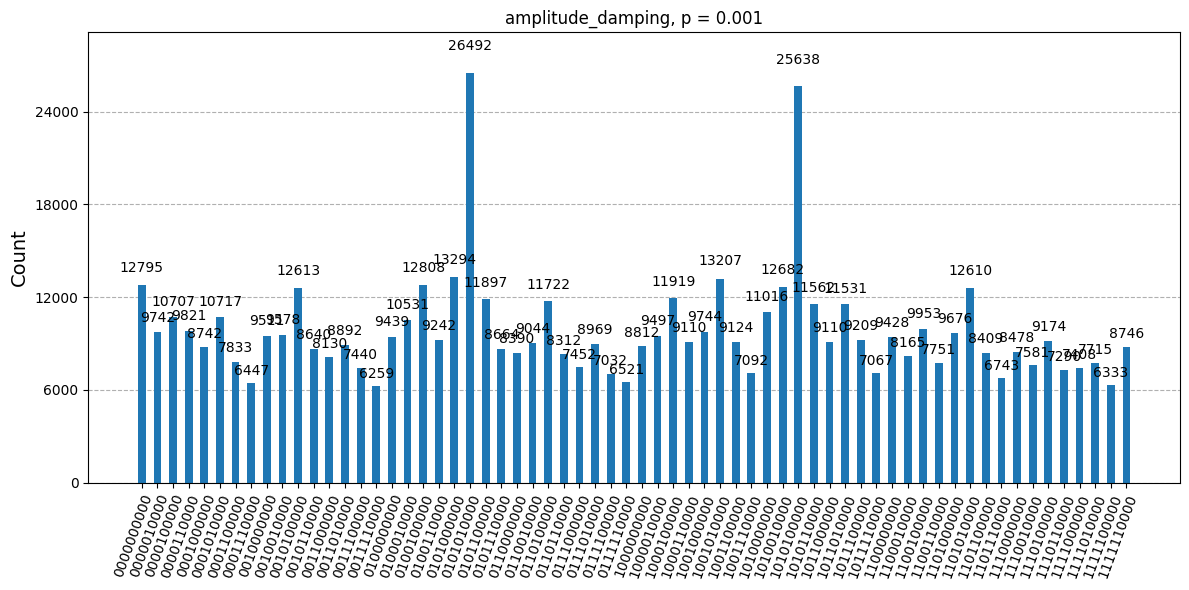

In [22]:
noise_model = make_noise_model("amplitude_damping", p=0.001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'amplitude_damping, p = 0.001')

{'0110110000': 6656, '0010010000': 6591, '0101110000': 8510, '0001110000': 251, '1001010000': 35105, '1110110000': 1333, '1101100000': 6681, '1010100000': 197806, '0100000000': 1715, '0101010000': 197394, '0110100000': 34945, '0010100000': 36727, '0101000000': 36436, '0001010000': 8326, '0111100000': 1585, '1000110000': 1293, '0100010000': 8074, '0110000000': 1273, '1011010000': 35272, '1100110000': 971, '0001100000': 1214, '1101110000': 1361, '1001000000': 6596, '0101100000': 34926, '1100100000': 6388, '1011100000': 8264, '1010010000': 34904, '0111000000': 1246, '1010110000': 36178, '1101010000': 36491, '0011010000': 6701, '1100010000': 1339, '0010110000': 6828, '1110010000': 1238, '0110010000': 6237, '0000000000': 2449, '0111010000': 8167, '0100100000': 34792, '1000100000': 8265, '1110100000': 8534, '1010000000': 8447, '1011000000': 6424, '1101000000': 6905, '1111110000': 2495, '1001110000': 1276, '0001000000': 1334, '1110000000': 288, '1111010000': 1657, '0100110000': 6681, '0000110

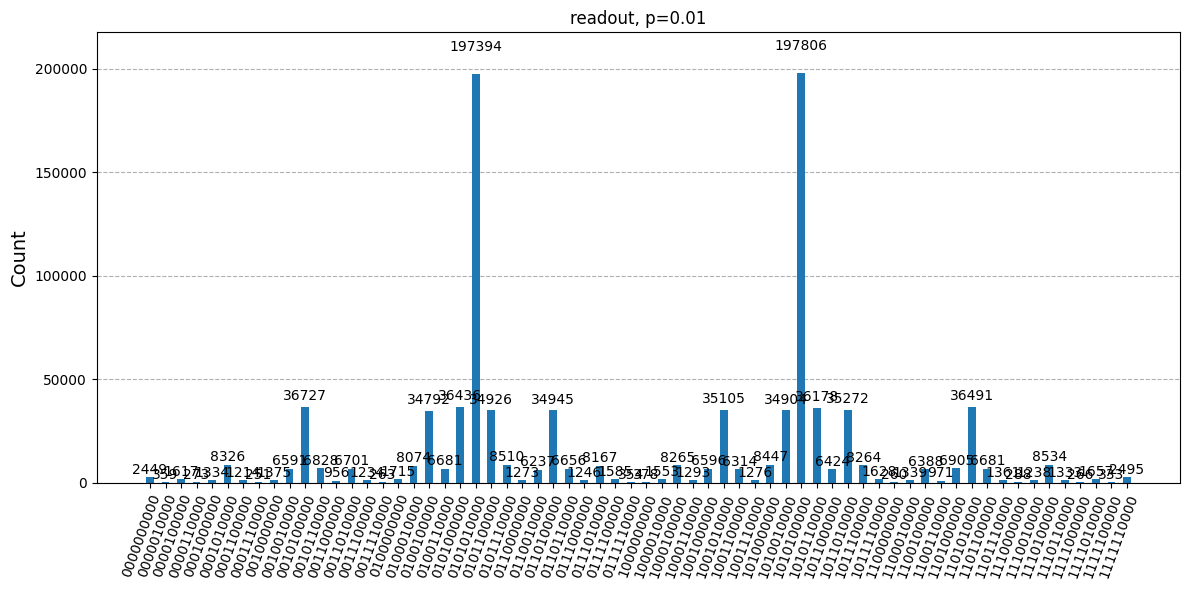

In [23]:
noise_model = make_noise_model("readout", p=0.01)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'readout, p=0.01')

{'0000000000': 12970, '1010000000': 21563, '0110000000': 6766, '0101110000': 21361, '0010100000': 33683, '0101100000': 28624, '0001010000': 21422, '0111000000': 7182, '0110100000': 28655, '1001000000': 14394, '0010110000': 16099, '0101010000': 86622, '1010100000': 85913, '1101100000': 14693, '0100110000': 14770, '1101000000': 16261, '1011110000': 10620, '1100010000': 7478, '0110110000': 14293, '1000100000': 20363, '1111100000': 7183, '0100000000': 10525, '0000100000': 10695, '0110010000': 13400, '0100100000': 28124, '0100010000': 20315, '1001100000': 13685, '1110100000': 21604, '0111110000': 7173, '1110010000': 6795, '0001110000': 5206, '1011100000': 20273, '1100100000': 14986, '1001010000': 28332, '1110110000': 8997, '1110000000': 5152, '0101000000': 33672, '0010010000': 14429, '1001110000': 6691, '1011010000': 28146, '1010110000': 33836, '1101010000': 33590, '1111010000': 10825, '1100000000': 4967, '0010000000': 9181, '1000010000': 8397, '0001000000': 9139, '0111100000': 8656, '10110

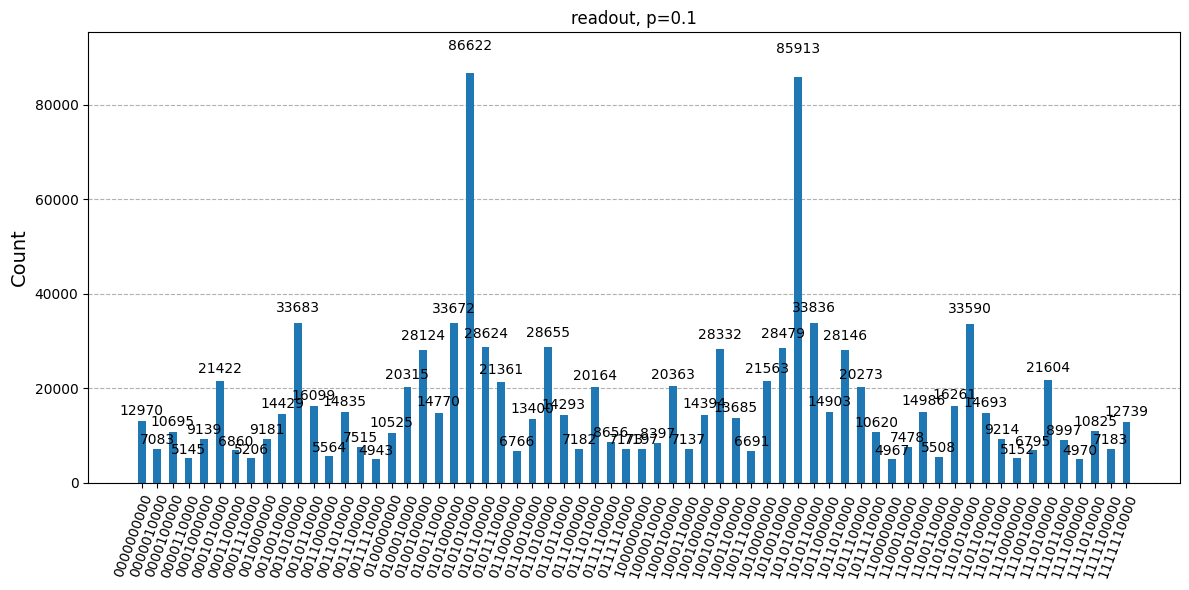

In [24]:
noise_model = make_noise_model("readout", p=0.1)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)
compiled = transpile(QSVT_qc, backend)
counts   = backend.run(compiled, shots=shots).result().get_counts()

print(filter_dict_by_trailing_zeros(counts, N))
plot_histogram(filter_dict_by_trailing_zeros(counts, N), figsize=(12,6), title = 'readout, p=0.1')